# Divorce Predictors

Dataset Link : https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#

References : https://dergipark.org.tr/en/pub/nevsosbilen/issue/46568/549416

In [ ]:
# Within the scope of this research, the divorce prediction was carried out by using the Divorce Predictors Scale (DPS) 
# on the basis of Gottman couples therapy. Of the participants, 84 (49%) were divorced and 86 (51%) were married couples.
# Participants completed the “Personal Information Form” and “Divorce Predictors Scale”.

# Gottman couples therapy is a model that explains the causes of divorce based on empirical research. 
# The criteria defined in the sound relationship house theory, within this model, are important divorce predictors. 
# The most important divorce predictors in the model are the four horsemen of the apocalypse. 
# Gottman describes them as Criticism, Contempt, Stonewalling and Defensiveness (Gottman, 2014; Gottman and Gottman, 2012).

# In his longitudinal study conducted with newly married couples, Gottman has estimated that the couples would divorce
# in the future with an 85% success rate by using these four variables alone. Similarly, in their 14 years of study, 
# further, Gottman and Levenson have found that this quadruple structure predicts divorces by 95% success rate. 
# According to Gottman, another predictor of divorce is the failure of repair attempts.
# When the failed repair attempts are combined with the "four horsemen", the divorce at the end of five years is estimated by 
# a 97.5% success rate. In addition, how the issue is first opened for discussion is also important in terms
# of addressing the conflict issues by couples. It has been observed that the data required for the prediction of divorce or 
# continued marriage can be obtained only in a few minutes for 96% of the couples. According to this, the
# behaviors and reactions of couples in just a few minutes following an argument give an idea about divorce. 
# Thus, harsh start up in an argument is one of the most obvious predictors that a debate or marriage will not go well.
# In addition, Gottman and Silver stated that the decisive factor in satisfaction of couples with sexuality, love and passion 
# in their marriages depends on the quality of friendship between husband and wife by 70%. 
# And, this friendship is expressed as a love map. 

# Let us explore the following dataset and apply Supervised Classification Techniques to classifiy the dataset into 2 classes
# i.e. Divorced and Not-Divorced.

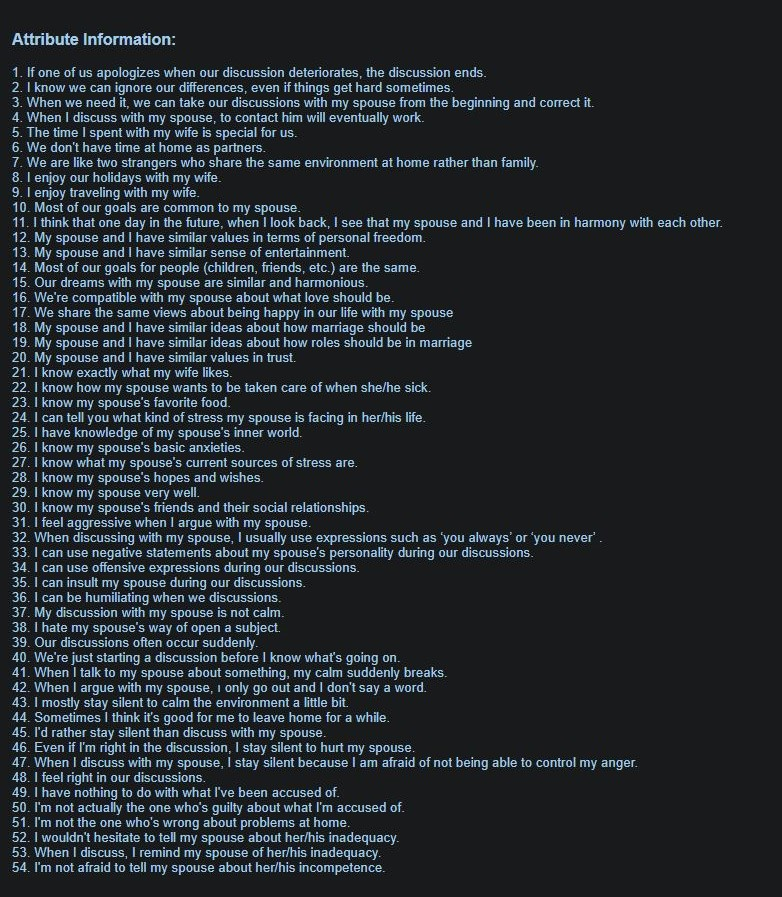

In [138]:
# importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve

In [4]:
# importing and reading the dataset

df = pd.read_excel('divorce.xlsx')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [6]:
df.shape

# There are 170 rows and 55 columns in our dataset

(170, 55)

In [16]:
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [19]:
df.isnull().sum()
# There are no null values in our dataset.

Atr1     0
Atr2     0
Atr3     0
Atr4     0
Atr5     0
Atr6     0
Atr7     0
Atr8     0
Atr9     0
Atr10    0
Atr11    0
Atr12    0
Atr13    0
Atr14    0
Atr15    0
Atr16    0
Atr17    0
Atr18    0
Atr19    0
Atr20    0
Atr21    0
Atr22    0
Atr23    0
Atr24    0
Atr25    0
Atr26    0
Atr27    0
Atr28    0
Atr29    0
Atr30    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
Atr39    0
Atr40    0
Atr41    0
Atr42    0
Atr43    0
Atr44    0
Atr45    0
Atr46    0
Atr47    0
Atr48    0
Atr49    0
Atr50    0
Atr51    0
Atr52    0
Atr53    0
Atr54    0
Class    0
dtype: int64

In [ ]:
# EDA and Insights

In [46]:
df['Class'].value_counts(normalize = True)*100

# 51 % of the cases are of non-divorce and 49 % of the cases are of divorce.
# Our dataset is balanced.

0    50.588235
1    49.411765
Name: Class, dtype: float64

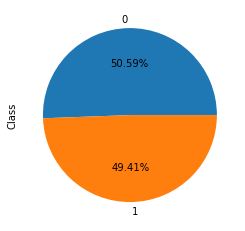

In [51]:
df['Class'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

In [35]:
df.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


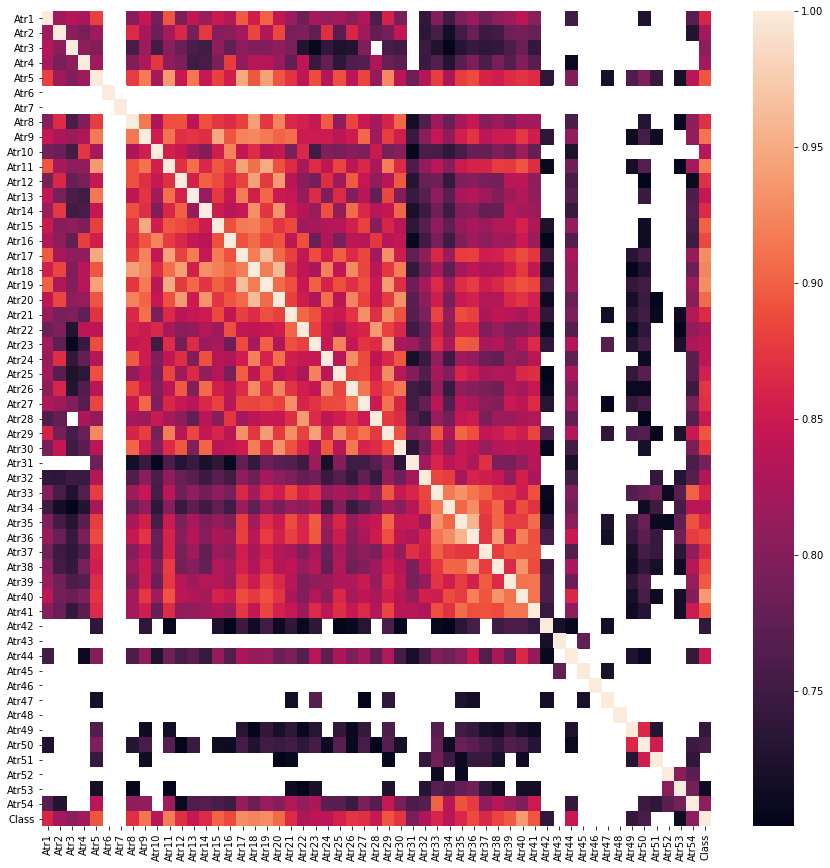

In [31]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr()[abs(df.corr()) > 0.70])
plt.show()

# From the above correlation heatmap, we can observe that many attributes are moderately to highly correlated.

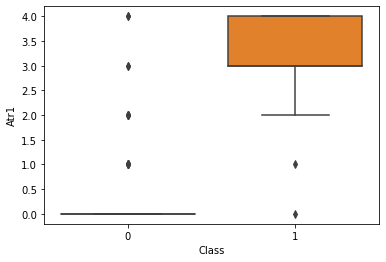

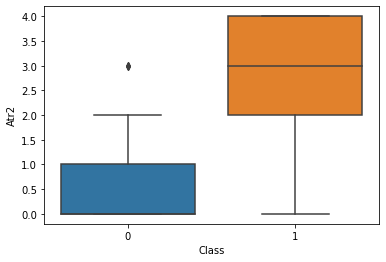

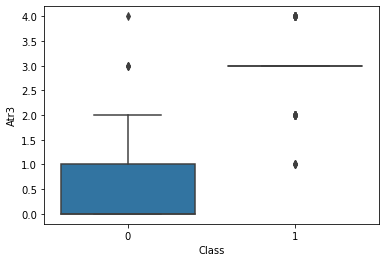

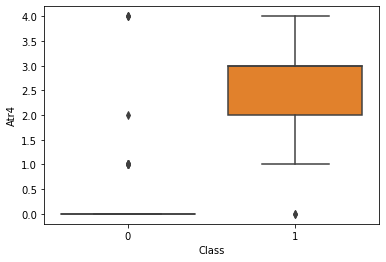

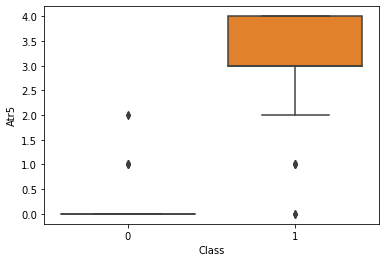

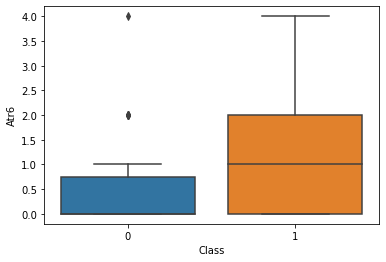

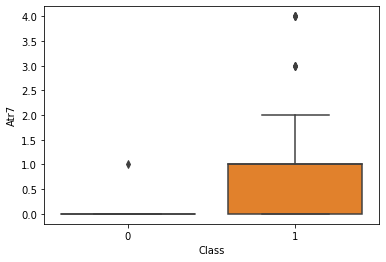

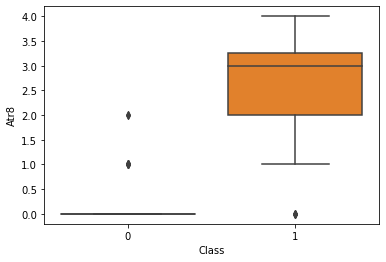

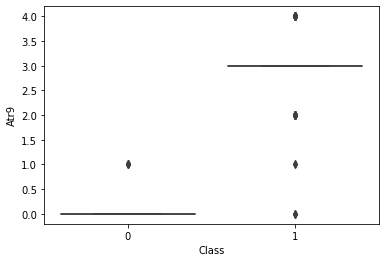

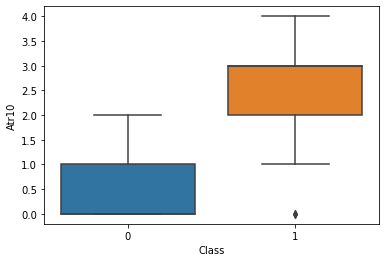

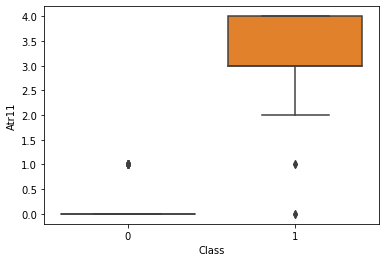

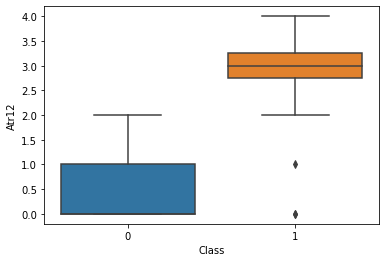

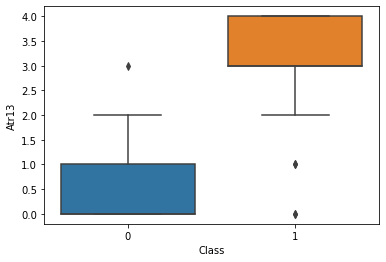

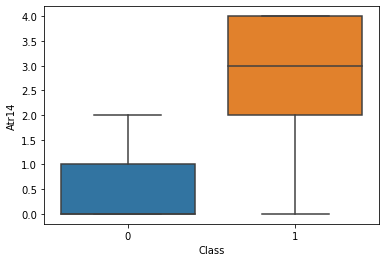

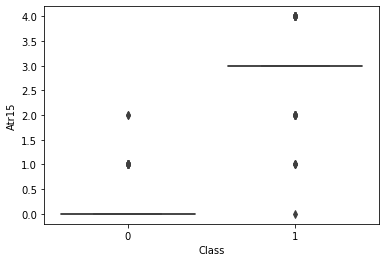

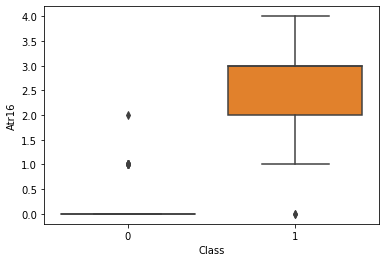

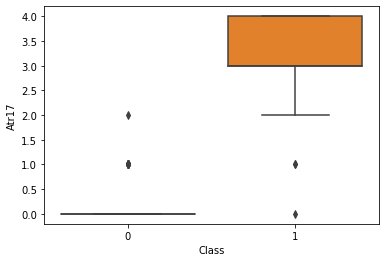

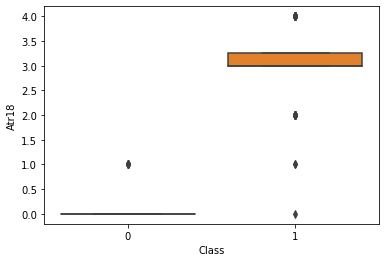

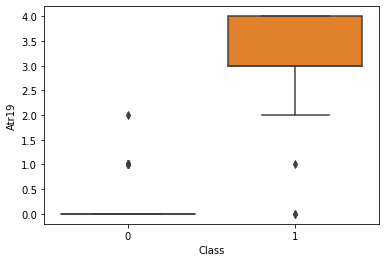

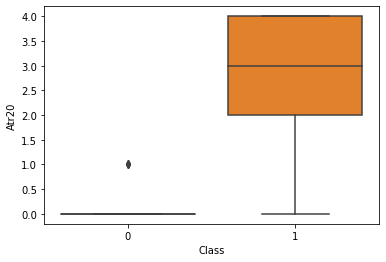

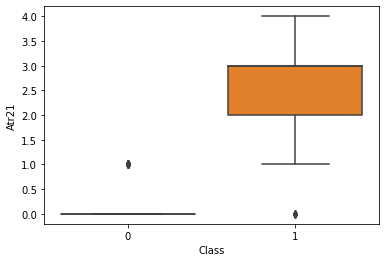

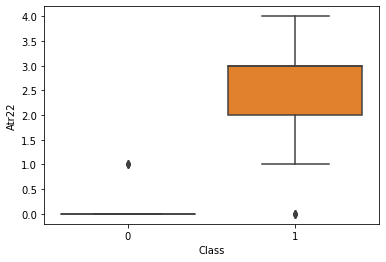

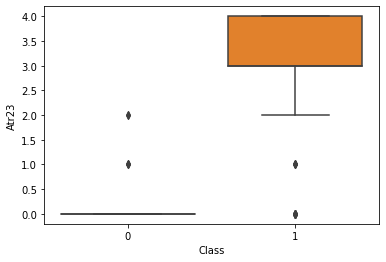

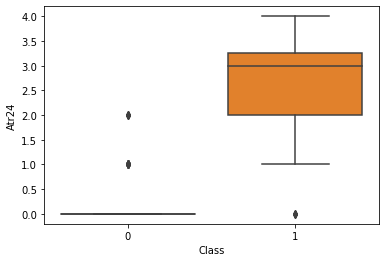

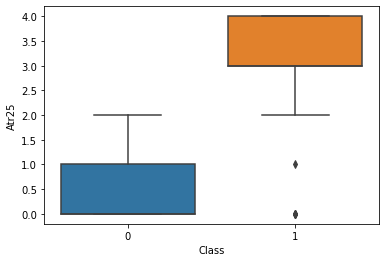

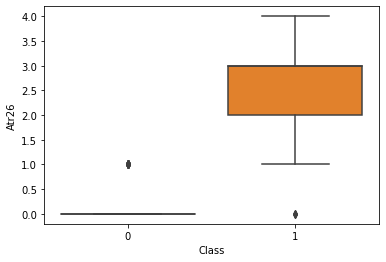

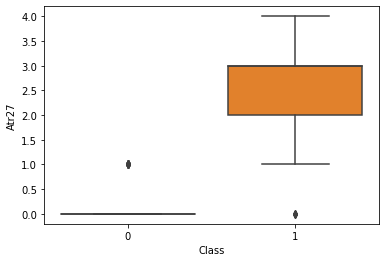

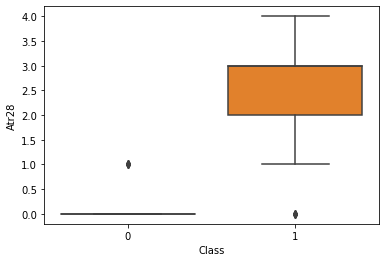

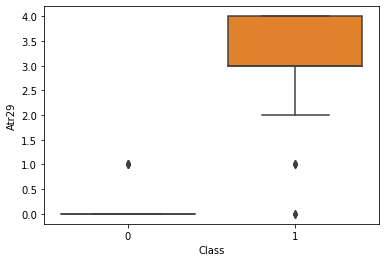

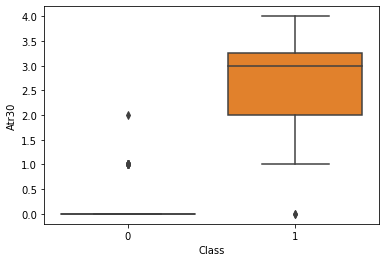

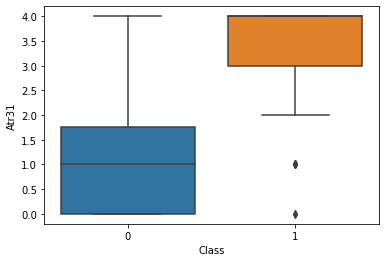

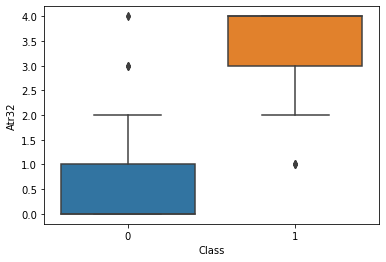

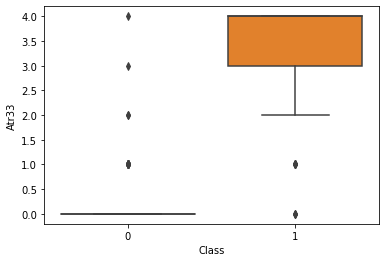

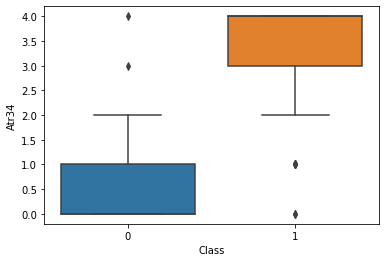

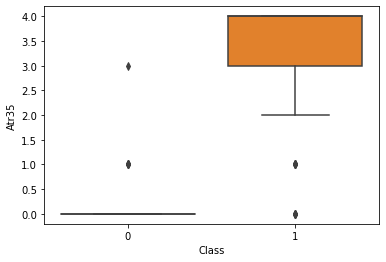

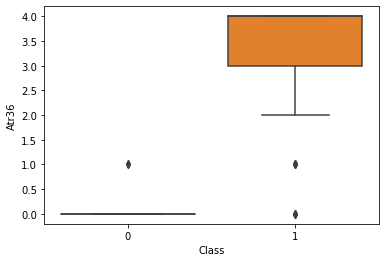

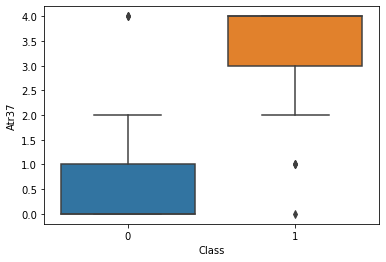

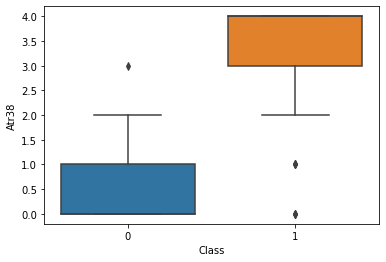

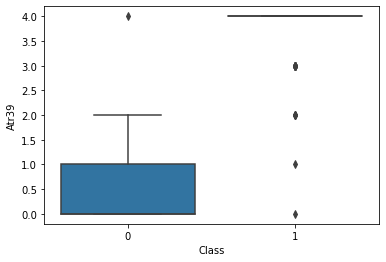

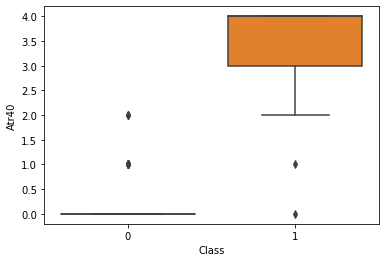

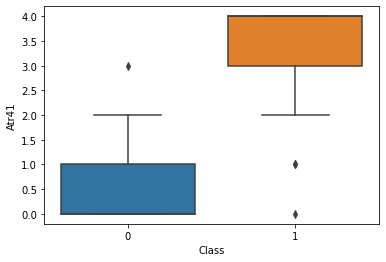

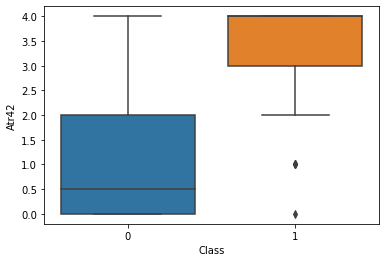

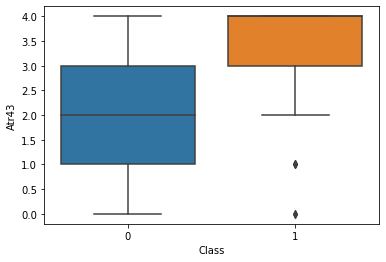

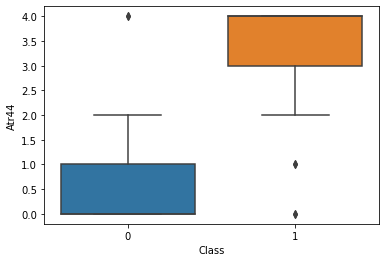

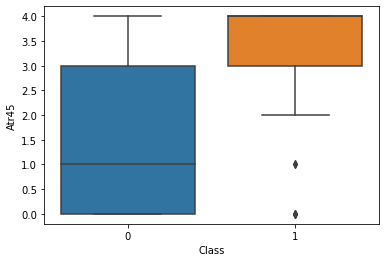

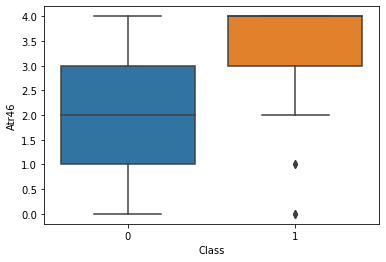

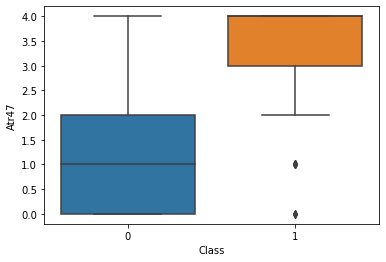

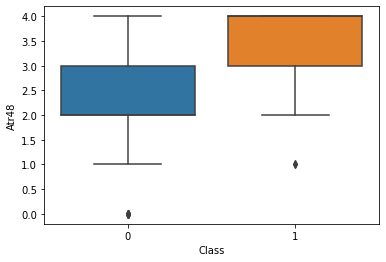

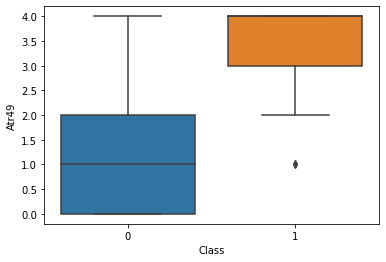

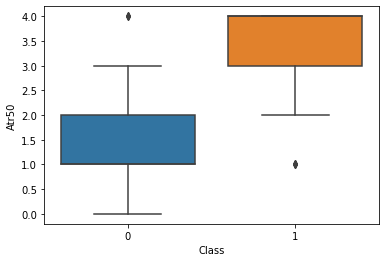

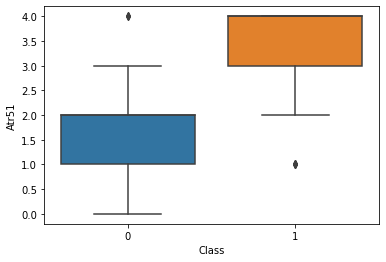

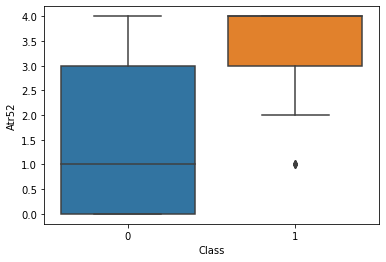

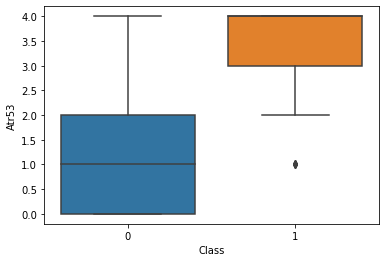

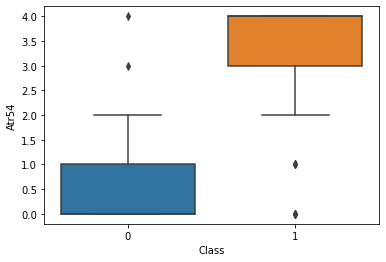

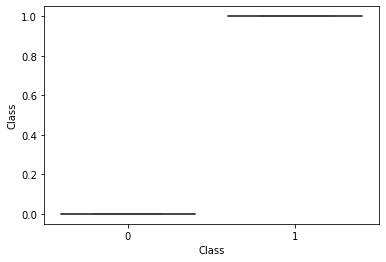

In [39]:
for i in df.columns:
    sns.boxplot(df['Class'], df[i])
    plt.show()
    
# For all the bocplots, we can observe that the distribution of the attributes is significantly different for the two classes
# in the target column - Divorced (1) and Not-Divorced (0).

In [ ]:
# Basic Model Building

In [52]:
# Independent Variables

X = df.drop('Class', axis = 1)

In [53]:
# Target Variable

y = df['Class']

In [55]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.94      1.00      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



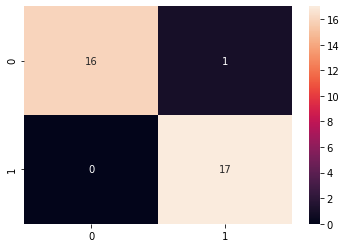

In [94]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
# We are getting very good results using Decision Tree Classifier.

In [102]:
dt_df = pd.DataFrame()
dt_df['Features'] = X_train.columns
dt_df['Importance'] = model_dt.feature_importances_
dt_df[dt_df['Importance'] > 0]

# The Decision Tree Classifier is using only 4 features to make the predictions.  

,Features,Importance
16,Atr17,0.915423
17,Atr18,0.027398
25,Atr26,0.028181
39,Atr40,0.028998


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



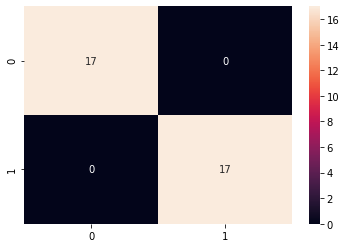

In [103]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
# We are getting almost perfect results using Random Forest Classifier.

In [105]:
rf_df = pd.DataFrame()
rf_df['Features'] = X_train.columns
rf_df['Importance'] = model_rf.feature_importances_
rf_df[rf_df['Importance'] > 0]

# Random Forest Classifier is giving adequate importance to majority of the attributes to make the predictions.

,Features,Importance
0,Atr1,0.001129
1,Atr2,0.001415
2,Atr3,0.003993
3,Atr4,0.009331
4,Atr5,0.002169
5,Atr6,0.000978
6,Atr7,0.000271
7,Atr8,0.035232
8,Atr9,0.040259
9,Atr10,0.010326


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



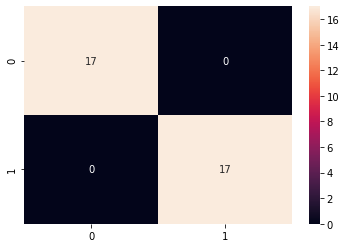

In [107]:
# AdaBoost 

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
model_ada = ada.fit(X_train, y_train)

y_pred = model_ada.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
# We are getting almost perfect results using AdaBoost Classifier.

In [108]:
ada_df = pd.DataFrame()
ada_df['Features'] = X_train.columns
ada_df['Importance'] = model_ada.feature_importances_
ada_df[rf_df['Importance'] > 0]

# AdaBoost Classifier is giving adequate importance to majority of the attributes to make the predictions.

,Features,Importance
0,Atr1,0.00
1,Atr2,0.04
2,Atr3,0.02
3,Atr4,0.02
4,Atr5,0.02
5,Atr6,0.00
6,Atr7,0.00
7,Atr8,0.00
8,Atr9,0.00
9,Atr10,0.00


[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



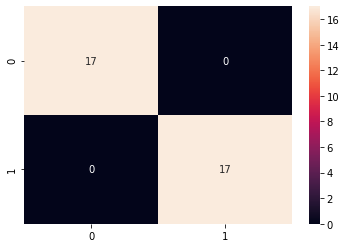

In [109]:
# XGBoost

import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
model_xgb = xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [110]:
# We are getting almost perfect results using XGBoost Classifier.

In [114]:
xgb_df = pd.DataFrame()
xgb_df['Features'] = X_train.columns
xgb_df['Importance'] = model_xgb.feature_importances_
xgb_df[rf_df['Importance'] > 0]

# XGBoost Classifier is giving adequate importance to majority of the attributes to make the predictions.

,Features,Importance
0,Atr1,0.000000
1,Atr2,0.000000
2,Atr3,0.001887
3,Atr4,0.008319
4,Atr5,0.000000
5,Atr6,0.000000
6,Atr7,0.000000
7,Atr8,0.000346
8,Atr9,0.000000
9,Atr10,0.000000


In [131]:
# Using SFS - 10 Features - Random Forest

from sklearn.feature_selection import RFE
rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = 10)
model_rfe = rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame()
rfe_df['Features'] = X_train.columns
rfe_df['Ranking'] = model_rfe.ranking_
imp_features = rfe_df.sort_values(by = 'Ranking').head(10)['Features'].values.tolist()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



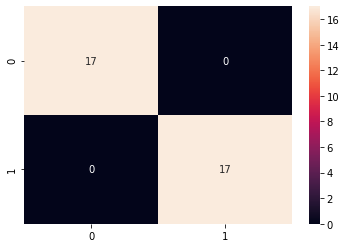

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(X_train[imp_features], y_train)

y_pred = model_rf.predict(X_test[imp_features])

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [133]:
# Using the above selected 10 features, we are getting similar good results.

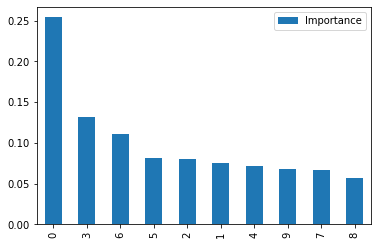

,Attributes,Importance
0,Atr18,0.254210
1,Atr30,0.075821
2,Atr26,0.079860
3,Atr40,0.132222
4,Atr20,0.072068
5,Atr19,0.081130
6,Atr17,0.111411
7,Atr9,0.067266
8,Atr16,0.057580
9,Atr11,0.068432


In [134]:
# SFS - 5 Features - Random Forest

imp_df = pd.DataFrame()
imp_df['Attributes'] = imp_features
imp_df['Importance'] = model_rf.feature_importances_
imp_df.sort_values('Importance', ascending = False).plot(kind = 'bar')
plt.show()

imp_df

# Top 10 attributes and their importance scores are as follows.

In [135]:
# Using SFS - 5 Features - Random Forest

rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = 5)
model_rfe = rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame()
rfe_df['Features'] = X_train.columns
rfe_df['Ranking'] = model_rfe.ranking_
imp_features = rfe_df.sort_values(by = 'Ranking').head(5)['Features'].values.tolist()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



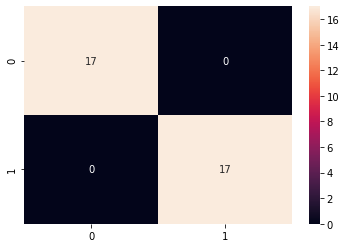

In [136]:
rf = RandomForestClassifier()
model_rf = rf.fit(X_train[imp_features], y_train)

y_pred = model_rf.predict(X_test[imp_features])

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

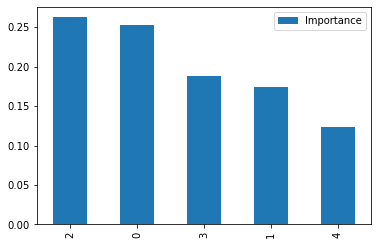

,Attributes,Importance
0,Atr17,0.252185
1,Atr20,0.173692
2,Atr18,0.262434
3,Atr19,0.188143
4,Atr26,0.123546


In [137]:
imp_df = pd.DataFrame()
imp_df['Attributes'] = imp_features
imp_df['Importance'] = model_rf.feature_importances_
imp_df.sort_values('Importance', ascending = False).plot(kind = 'bar')
plt.show()

imp_df

# Top 5 attributes and their importance scores are as follows.

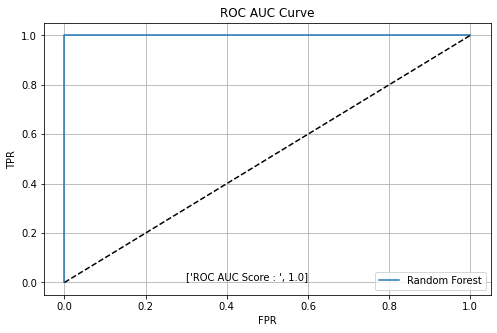

In [140]:
y_pred_prob = model_rf.predict_proba(X_test[imp_features])

fpr, tpr, th = roc_curve(y_test, y_pred_prob[:, 1])

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, label = 'Random Forest')
plt.plot([0,1], [0,1], '--k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.text(0.3, 0.01, s = ['ROC AUC Score : ', roc_auc_score(y_test, y_pred_prob[:, 1])])
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ROC Score = 1

In [142]:
Kappa_Score = cohen_kappa_score(y_test, y_pred)
Kappa_Score

# Kappa SCore = 1 which signifies that the predictions are near perfect.

1.0

In [ ]:
# Using the above 5 attributes we are getting similar good results.

In [ ]:
# We can consider the above model as our final model with 5 attributes.

In [ ]:
# Important Attributes are:

# Atr17 : My spouse and I have similar ideas about how marriage should be.
# Atr20 : I know exactly what my wife likes.
# Atr18 : My spouse and I have similar ideas about how roles should be in marriage.
# Atr19 : My spouse and I have similar values in trust.
# Atr26 : I know what my spouse's current sources of stress are.

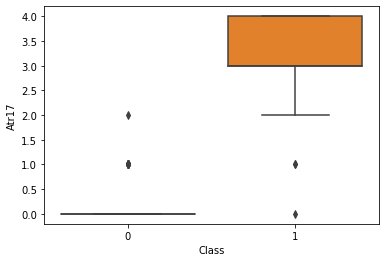

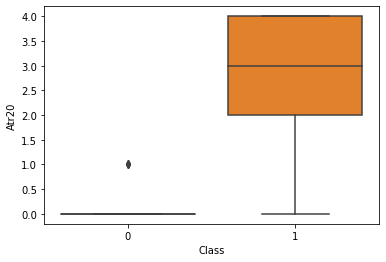

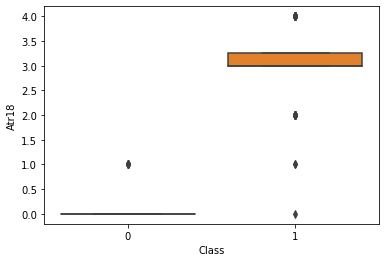

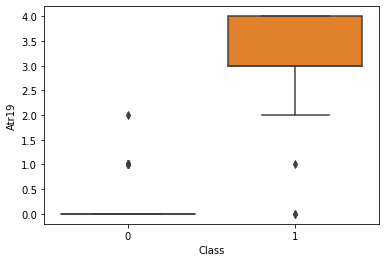

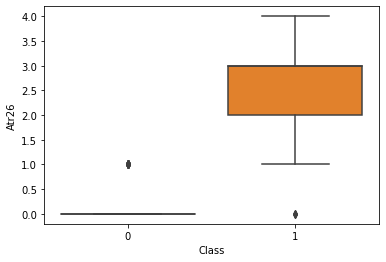

In [150]:
sns.boxplot(df['Class'], df['Atr17'])
plt.show()

sns.boxplot(df['Class'], df['Atr20'])
plt.show()

sns.boxplot(df['Class'], df['Atr18'])
plt.show()

sns.boxplot(df['Class'], df['Atr19'])
plt.show()

sns.boxplot(df['Class'], df['Atr26'])
plt.show()

In [ ]:
# The boxplots above for the important attributes clearly show that the distribution of the attributes for the two target
# classes is significantly different.

In [ ]:
# Following images explain what is a love map and also gives an example of a Love Map Exercise.

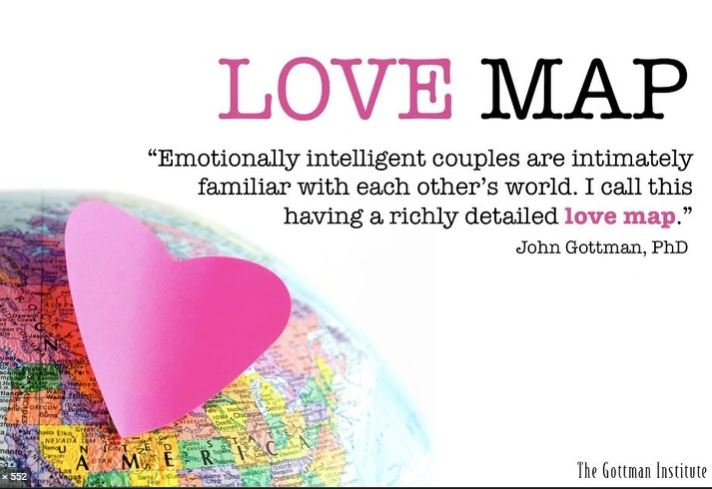

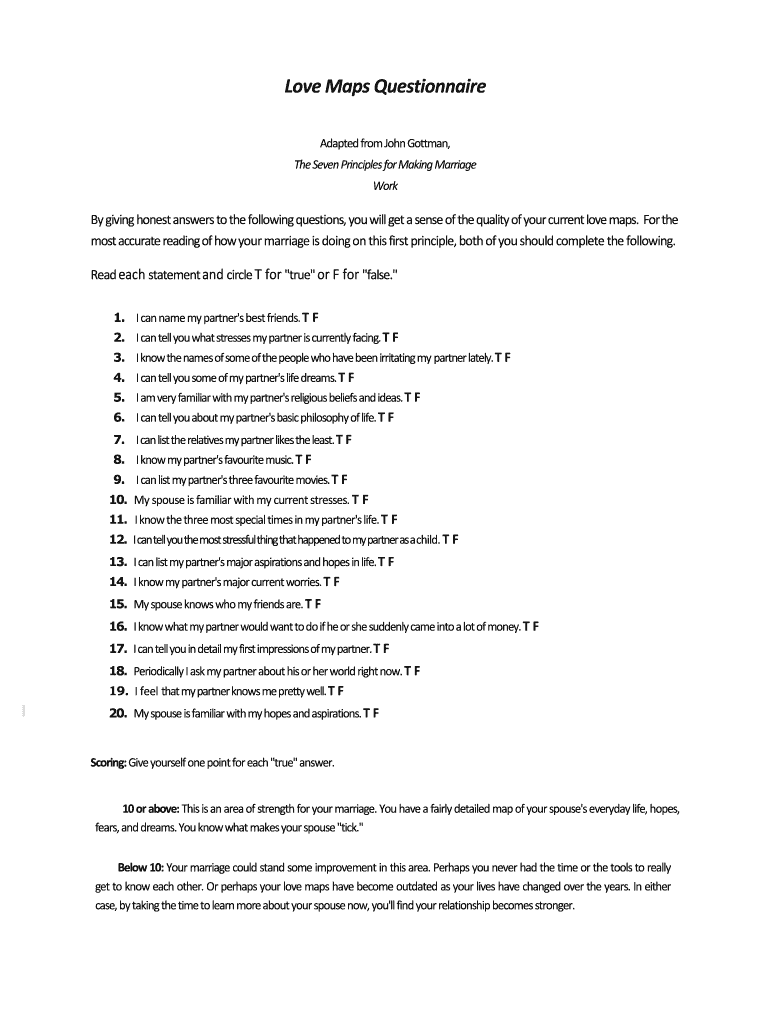

In [177]:
# Following are Dr. John Gottman's 7 Principles of Successful Relationships.

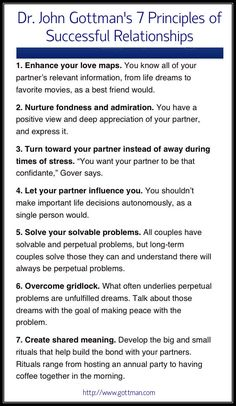